In [27]:
import json
import pandas as pd

# Load JSON data into a dictionary
with open('experiments.json', 'r') as file:
    data = json.load(file)


df = pd.DataFrame()

for d in data:
    if (d['decision2_note'] != '' or d['decision1_note'] != ''):
        new_data = {'context': d['context'], 'decision1': d['decision1'], 'decision2': d['decision2'], d['decision1_approach']: d['decision1_note'], d['decision2_approach']: d['decision2_note']}
        df = pd.concat([df, pd.DataFrame([new_data])], ignore_index=True)

df = df[['context', 'decision1', 'decision2', 1, 2, 3, 4, 5]]
df.to_excel('quality.xlsx', index=False)



### Length analyis

In [62]:
import pandas as pd
import tiktoken
encoding = tiktoken.get_encoding("cl100k_base")


def sentence_length(sentence):
    tokens = encoding.encode(sentence)
    return len(tokens)

In [106]:
# df = pd.read_excel('quality.xlsx')
df = pd.read_excel('../../ADR_results.xlsx', sheet_name='analysis', header=1)
df.drop(index=0, inplace=True)
df = df[['context', 'Gemeni-0shot', 'GPT-Rag', 'Gemma-Finetuning', 'Flan-T5-approach', 'Llama-approach']]
context_list = df['context'].tolist()[2:]
gemini_list = df['Gemeni-0shot'].dropna().tolist()[2:]
GPT_list = df['GPT-Rag'].dropna().tolist()[2:]
gemma_list = df['Gemma-Finetuning'].dropna().tolist()[2:]
flan_t5_list = df['Flan-T5-approach'].dropna().tolist()[2:]
llama_list = df['Llama-approach'].dropna().tolist()[2:]

In [107]:
def average_length(lst):
    return sum(sentence_length(item) for item in lst) / len(lst) if lst else 0

average_lengths = {
    'context': average_length(context_list),
    'Gemeni-0shot': average_length(gemini_list),
    'GPT-Rag': average_length(gpt_list),
    'Gemma-Finetuning': average_length(gemma_list),
    'Flan-T5-approach': average_length(flan_t5_list),
    'Llama-approach': average_length(llama_list)
}

print(average_lengths)

{'context': 79.40833333333333, 'Gemeni-0shot': 22.896551724137932, 'GPT-Rag': 22.4, 'Gemma-Finetuning': 20.38095238095238, 'Flan-T5-approach': 14.934782608695652, 'Llama-approach': 16.71212121212121}


In [110]:
import pandas as pd

def average_length(lst):
    return sum(len(item) for item in lst) / len(lst) if lst else 0

def length(Decision):
    Decision_length = [sentence_length(d) for d in Decision]
    Decision_length.sort()
    threshold = 500
    Decision_length = [length for length in Decision_length if length <= threshold]
    # Decision_length = Decision_length[:int(len(Decision_length) * 0.8)]
    avg_Decision_length = sum(Decision_length) / len(Decision_length)
    print(avg_Decision_length)

    plt.hist(Decision_length, bins=50, edgecolor='black')
    plt.title('Histogram of Lengths')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()



test Decision
98.45336225596529


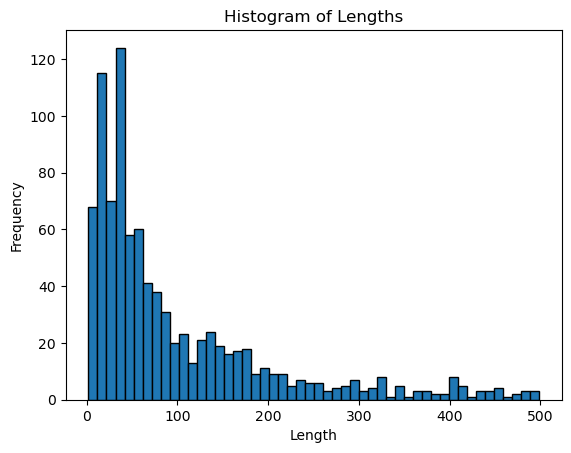

test Context
120.69277721261444


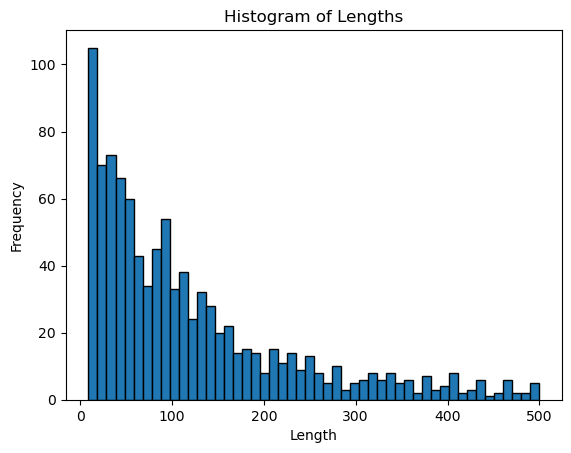

train Decision
98.46559297218155


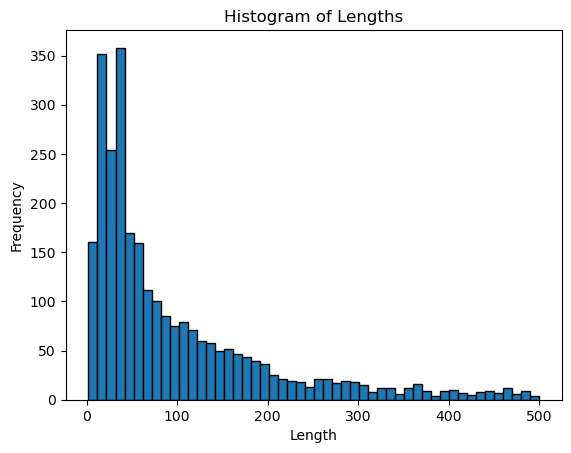

train Context
120.69348268839104


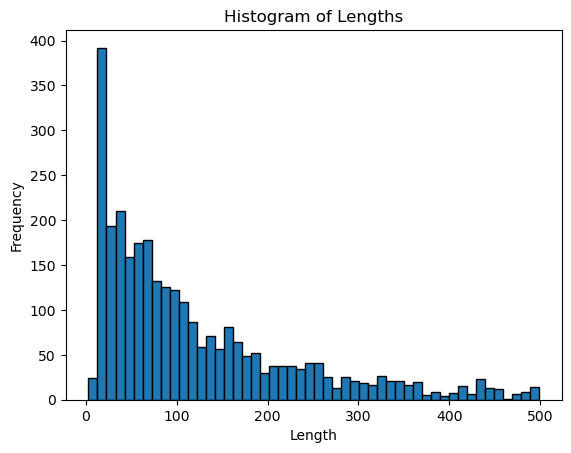

In [111]:
data_test = pd.read_json(f'../../Data/ADR-data/data_test.jsonl', lines=True)
data_train = pd.read_json(f'../../Data/ADR-data/data_train.jsonl', lines=True)

Decision = data_test['Decision'].tolist()
print("test Decision")
length(Decision)
Context = data_test['Context'].tolist()
print("test Context")
length(Context)

Decision = data_train['Decision'].tolist()
print("train Decision")
length(Decision)
Context = data_train['Context'].tolist()
print("train Context")
length(Context)

Gemeni-0shot
239.0615866388309


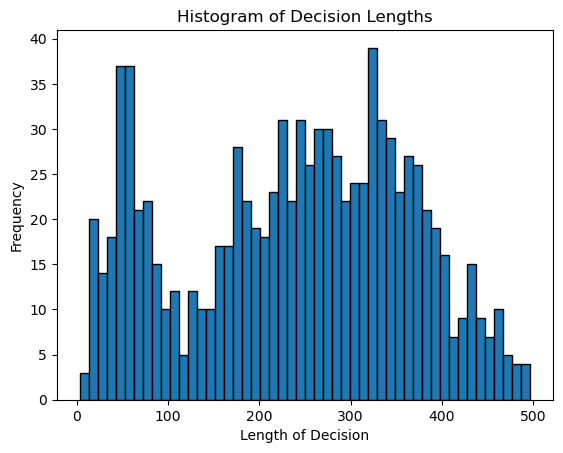

In [97]:
data_0shot = pd.read_json(f'../../0_shot/results/gemini-1.5-pro_test.jsonl', lines=True)
Prediction = data_0shot['Prediction'].tolist()
print("Gemeni-0shot")
length(Prediction)

GPT-Rag
207.54276315789474


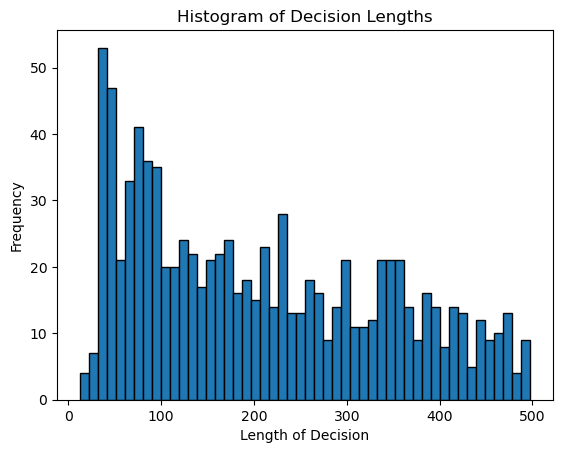

In [99]:
data_RAG = pd.read_json(f'../../RAG/results/gpt-4o.jsonl', lines=True)
Prediction = data_RAG['Predicted'].tolist()
print("GPT-Rag")
length(Prediction)

Gemma-Finetuning
116.01925254813138


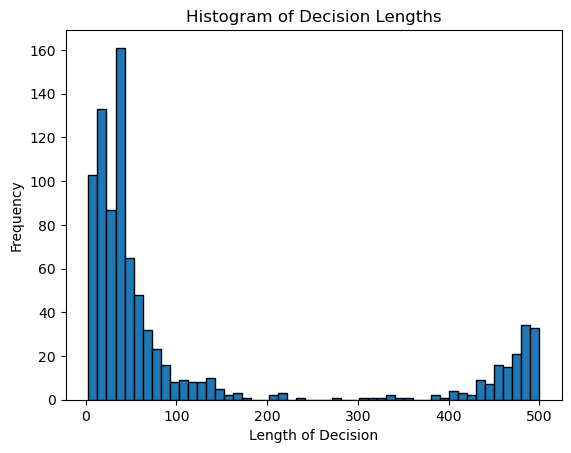

In [100]:
data_Finetuning = pd.read_json(f'../../Finetuning/results/gemma-without-system.jsonl', lines=True)
Prediction = data_Finetuning['Predictions'].tolist()
print("Gemma-Finetuning")
length(Prediction)

Flan-T5-approach
85.68207440811724


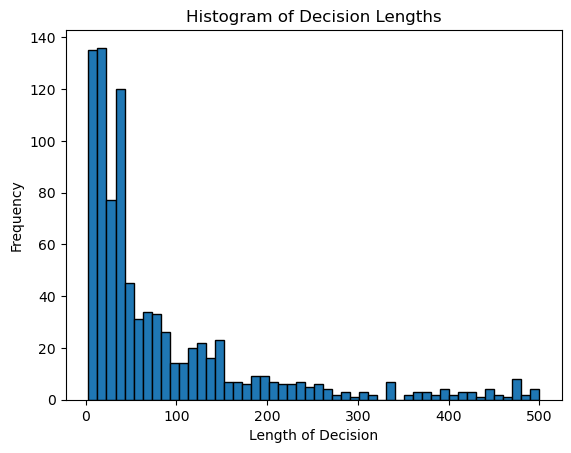

In [101]:
data_Flan_T5_approach = pd.read_json(f'../../Approach/results/flan-t5-base-test.jsonl', lines=True)
Prediction = data_Flan_T5_approach['Predictions'].tolist()
print("Flan-T5-approach")
length(Prediction)

Llama-approach
67.42872454448018


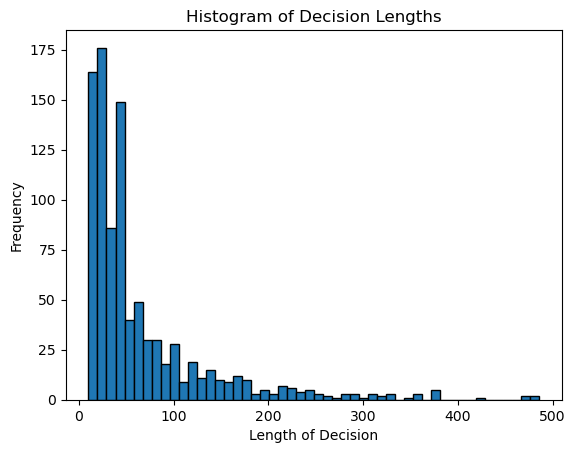

In [102]:
data_Llama_approach = pd.read_json(f'../../Approach/results/autotrain-llama-5.jsonl', lines=True)
Prediction = data_Llama_approach['Predictions'].tolist()
print("Llama-approach")
length(Prediction)